# Capstone Project - Accident Severity 

##### Applied Data Science Capstone by IBM/Coursera

#### This project aims to predict accident severity base on objective features: **collision address, weather conditions, road conditions, and light conditions**. 

## Part 1: Data Cleaning

### Import Data

In [45]:
#import libraries and dataset
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
df_org = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df_org.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [46]:
#understand data info
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

### Select Features

In [47]:
# select the features for this project
feature_lst = ['SEVERITYCODE','ADDRTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']

In [48]:
#create new dataframe with selected features
df_sel=df_org[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   ADDRTYPE        192747 non-null  object
 2   INATTENTIONIND  29805 non-null   object
 3   UNDERINFL       189789 non-null  object
 4   WEATHER         189592 non-null  object
 5   ROADCOND        189661 non-null  object
 6   LIGHTCOND       189503 non-null  object
 7   SPEEDING        9333 non-null    object
dtypes: int64(1), object(7)
memory usage: 11.9+ MB


In [49]:
df_sel.head()

,SEVERITYCODE,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,NaN,N,Overcast,Wet,Daylight,NaN
1,1,Block,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,NaN,0,Overcast,Dry,Daylight,NaN
3,1,Block,NaN,N,Clear,Dry,Daylight,NaN
4,2,Intersection,NaN,0,Raining,Wet,Daylight,NaN


### Formate data to '0' & '1' in 'INATTENTIONIND' 'UNDERINFL' 'SPEEDING' columns

In [50]:
#find out unique values from following columns
print('INATTENTIONIND', df_sel.INATTENTIONIND.unique())
print('UNDERINFL', df_sel.UNDERINFL.unique())
print('SPEEDING', df_sel.SPEEDING.unique())

INATTENTIONIND [nan 'Y']
UNDERINFL ['N' '0' nan '1' 'Y']
SPEEDING [nan 'Y']


In [51]:
#Turn categorical values to numeric variables, 0/1
#Treat all possible null values, i.e. N, NaN, or 0, to 0
df_sel.replace(np.nan, 0, inplace = True)
df_sel.replace('N', 0, inplace = True)
df_sel.replace('0', 0, inplace = True)
df_sel.replace('1', 1, inplace = True)
df_sel.replace('Y', 1, inplace = True)
df_sel.head()

,SEVERITYCODE,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,0,0,Overcast,Wet,Daylight,0
1,1,Block,0,0,Raining,Wet,Dark - Street Lights On,0
2,1,Block,0,0,Overcast,Dry,Daylight,0
3,1,Block,0,0,Clear,Dry,Daylight,0
4,2,Intersection,0,0,Raining,Wet,Daylight,0


In [52]:
#check out how many 0/1 in these columns
print(df_sel['INATTENTIONIND'].value_counts())
print(df_sel['UNDERINFL'].value_counts())
print(df_sel['SPEEDING'].value_counts())

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64
0    185552
1      9121
Name: UNDERINFL, dtype: int64
0    185340
1      9333
Name: SPEEDING, dtype: int64


### Drop value 1 in 'INATTENTIONIND' 'UNDERINFL' 'SPEEDING' columns
Value 1 in these columns indicates the collisions might be related with inattention, drug or alcohol influence, or speeding
By removing rows contained value 1, we make sure the collisions only have a relationship with the selected objective features: collision address, weather conditions, road conditions, and light conditions

In [53]:
#drop accidents possibly related with inattention, underinfluence, speeding, i.e. rows contain value 1
df = df_sel[(df_sel.INATTENTIONIND != 1) & (df_sel.UNDERINFL != 1) & (df_sel.SPEEDING != 1)]
df.head()

,SEVERITYCODE,ADDRTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,0,0,Overcast,Wet,Daylight,0
1,1,Block,0,0,Raining,Wet,Dark - Street Lights On,0
2,1,Block,0,0,Overcast,Dry,Daylight,0
3,1,Block,0,0,Clear,Dry,Daylight,0
4,2,Intersection,0,0,Raining,Wet,Daylight,0


In [54]:
print(df['INATTENTIONIND'].value_counts())
print(df['UNDERINFL'].value_counts())
print(df['SPEEDING'].value_counts())

0    149315
Name: INATTENTIONIND, dtype: int64
0    149315
Name: UNDERINFL, dtype: int64
0    149315
Name: SPEEDING, dtype: int64


Now the dataset only contains value 0 in 'INATTENTIONIND' 'UNDERINFL' 'SPEEDING' columns.
Let's drop these columns for better understanding

In [55]:
#so far, the accidents caused by inattention, influence of drugs or alcohol, and speeding were removed
#then, remove these columns for further process
df1 = pd.DataFrame(df[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']])
df1.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Overcast,Wet,Daylight
1,1,Block,Raining,Wet,Dark - Street Lights On
2,1,Block,Overcast,Dry,Daylight
3,1,Block,Clear,Dry,Daylight
4,2,Intersection,Raining,Wet,Daylight


### Drop missing values in 'ADDRTYPE''WEATHER''ROADCOND''LIGHTCOND'

In [56]:
print(df['ADDRTYPE'].value_counts())
print(df['WEATHER'].value_counts())
print(df['ROADCOND'].value_counts())
print(df['LIGHTCOND'].value_counts())

Block           93018
Intersection    53983
0                1724
Alley             590
Name: ADDRTYPE, dtype: int64
Clear                       83630
Raining                     23922
Overcast                    20604
Unknown                     14190
0                            5034
Other                         740
Snowing                       652
Fog/Smog/Smoke                389
Sleet/Hail/Freezing Rain       82
Blowing Sand/Dirt              47
Severe Crosswind               20
Partly Cloudy                   5
Name: WEATHER, dtype: int64
Dry               94093
Wet               34349
Unknown           14134
0                  4995
Ice                 773
Snow/Slush          707
Other                94
Standing Water       58
Oil                  57
Sand/Mud/Dirt        55
Name: ROADCOND, dtype: int64
Daylight                    89428
Dark - Street Lights On     33494
Unknown                     12696
0                            5109
Dusk                         4571
Dawn    

Treat '0'  and 'unknown' as missing values

In [57]:
#drop missing or unknown values 
df1 = df1[(df1.ADDRTYPE != 0) & (df1.ADDRTYPE != 0) & (df1.ADDRTYPE != 'Unknown') & (df1.ROADCOND != 'Unknown') & (df1.ROADCOND != 0) & (df1.LIGHTCOND != 'Unknown') & (df1.LIGHTCOND != 0)]
df1.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Overcast,Wet,Daylight
1,1,Block,Raining,Wet,Dark - Street Lights On
2,1,Block,Overcast,Dry,Daylight
3,1,Block,Clear,Dry,Daylight
4,2,Intersection,Raining,Wet,Daylight


## Part 2: Balance Data

### Check if the data is unbalanced

SEVERITY 1: 87019
SEVERITY 2: 39899


<AxesSubplot:title={'center':'Count'}>

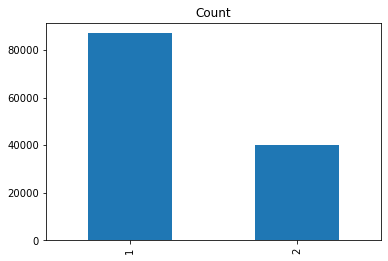

In [58]:
#check if dataset is unbalanced
print('SEVERITY 1:', df1['SEVERITYCODE'].value_counts()[1])
print('SEVERITY 2:', df1['SEVERITYCODE'].value_counts()[2])
df1['SEVERITYCODE'].value_counts().plot(kind='bar', title='Count')

There are a lot more data in Severity 2. It is an unbalanced dataset.

### Use under-sampling method to balance data

In [59]:
#use under-sampling to balance data
from sklearn.utils import resample
df_maj = df1[df1.SEVERITYCODE==1]
df_min = df1[df1.SEVERITYCODE==2]
df_ds = resample(df_maj, replace=True, n_samples=39899, random_state=None) 
df_downsampled = pd.concat([df_ds, df_min])
df_downsampled.SEVERITYCODE.value_counts()

2    39899
1    39899
Name: SEVERITYCODE, dtype: int64

Now the dataset is balanced. Both Severity 1 and Severity 2 have 39899 data. 

In [60]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79798 entries, 17272 to 194671
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SEVERITYCODE  79798 non-null  int64 
 1   ADDRTYPE      79798 non-null  object
 2   WEATHER       79798 non-null  object
 3   ROADCOND      79798 non-null  object
 4   LIGHTCOND     79798 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


### Convert categorical data to numerical data

Change data type from object to float for easier processing

In [61]:
#convert categorical data to numerical data
df2 = pd.get_dummies(df_downsampled,dtype=float)
df2.head()

,SEVERITYCODE,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_0,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,...,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other
17272,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99043,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
167696,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95634,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38172,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79798 entries, 17272 to 194671
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SEVERITYCODE                        79798 non-null  int64  
 1   ADDRTYPE_Alley                      79798 non-null  float64
 2   ADDRTYPE_Block                      79798 non-null  float64
 3   ADDRTYPE_Intersection               79798 non-null  float64
 4   WEATHER_0                           79798 non-null  float64
 5   WEATHER_Blowing Sand/Dirt           79798 non-null  float64
 6   WEATHER_Clear                       79798 non-null  float64
 7   WEATHER_Fog/Smog/Smoke              79798 non-null  float64
 8   WEATHER_Other                       79798 non-null  float64
 9   WEATHER_Overcast                    79798 non-null  float64
 10  WEATHER_Partly Cloudy               79798 non-null  float64
 11  WEATHER_Raining                     

## Part 3: Use various algorithms to build the model

In [67]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Split data into training set and testing set

The following algorithms will use the same set of trainning data and testing data.

In [63]:
#Predict the accident severity with various machine learning algorithms
#Train Test Split
from sklearn.model_selection import train_test_split
y = df2['SEVERITYCODE']
X = df2.drop('SEVERITYCODE', axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (63838, 31) (63838,)
Test set: (15960, 31) (15960,)


### Visualize top 5 important features 

No handles with labels found to put in legend.


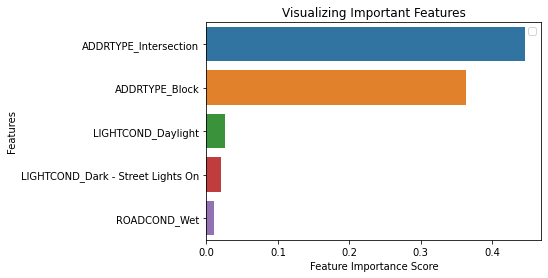

In [64]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:5], y=feature_imp.index[:5])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

“Intersection” and “Block” are the most important features of predicting a car accident, far ahead from the rest. 

### Model 1: K-Nearest Neighbors

In [39]:
#K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)

[0.460401   0.51848371 0.44235589 0.44461153 0.44793233 0.49035088
 0.45570175 0.51102757 0.52218045]


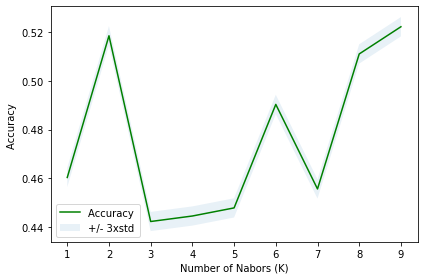

The best accuracy was with 0.5221804511278195 with k= 9


In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [41]:
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

### Model 2: Decision Tree

In [65]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
dt

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Model 3: Support Vector Machine 

In [68]:
#SVM
from sklearn import svm
func_list = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_score = []
for func in func_list:
    SVM = svm.SVC(kernel=func)
    SVM.fit(X_train, y_train)
    svm_yhat = SVM.predict(X_test)
    accuracy_score.append(f1_score(y_test, svm_yhat, average='weighted'))
accuracy_score

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.6031060456958094, 0.603490197575329, 0.6033113995234737, 0.5205169930622406]

In [74]:
print("Kernel 'poly' has the highest accuracy score")
SVM = svm.SVC(kernel='poly')
SVM.fit(X_train, y_train)
SVM

Kernel 'poly' has the highest accuracy score


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Model 4: Logistic Regression

In [76]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
c_list = [0.1, 0.01, 0.001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
idx = []
accuracy_score = []
for idx1, c in enumerate(c_list):
    for idx2, sol in enumerate(solver_list):
        idx.append(idx2 + idx1 * 5)
        LR = LogisticRegression(C=c, solver=sol).fit(X_train, y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)
        accuracy_score.append(log_loss(y_test, yhat_prob))
        print("Test ", (idx2 + idx1 * 5), ": Accuracy at c =", c,"solver=", sol,
              "is : ", log_loss(y_test, yhat_prob))

Test  0 : Accuracy at c = 0.1 solver= newton-cg is :  0.6683646435404904


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Test  1 : Accuracy at c = 0.1 solver= lbfgs is :  0.6683651250607079
Test  2 : Accuracy at c = 0.1 solver= liblinear is :  0.6683718352302331
Test  3 : Accuracy at c = 0.1 solver= sag is :  0.6683645971192955
Test  4 : Accuracy at c = 0.1 solver= saga is :  0.6683647008973135
Test  5 : Accuracy at c = 0.01 solver= newton-cg is :  0.6685445339120804
Test  6 : Accuracy at c = 0.01 solver= lbfgs is :  0.6685438153987256
Test  7 : Accuracy at c = 0.01 solver= liblinear is :  0.6685875006772205
Test  8 : Accuracy at c = 0.01 solver= sag is :  0.6685446901911046
Test  9 : Accuracy at c = 0.01 solver= saga is :  0.6685445402086606
Test  10 : Accuracy at c = 0.001 solver= newton-cg is :  0.6692420915606211
Test  11 : Accuracy at c = 0.001 solver= lbfgs is :  0.669241302450715
Test  12 : Accuracy at c = 0.001 solver= liblinear is :  0.6692750685550132
Test  13 : Accuracy at c = 0.001 solver= sag is :  0.6692424117819141
Test  14 : Accuracy at c = 0.001 solver= saga is :  0.6692418772763957


Text(0, 0.5, 'Accuracy')

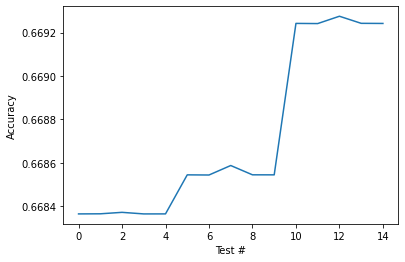

In [77]:
plt.plot(idx, accuracy_score)
plt.xlabel('Test #')
plt.ylabel('Accuracy')

In [78]:
print("It shows that 'Test 12' has the highest accuracy, where c = 0.001, solver is 'liblinear' ")
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train, y_train)
LR

It shows that 'Test 12' has the highest accuracy, where c = 0.001, solver is 'liblinear' 


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Part 4: Model Evaluation

Use **F1-score** and **Jaccard index** to find out the accuracies of these four models built by different algorithms. 

#### KNN 

In [79]:
#Model Evaluation
#accuracy for various algorithms
#KNN
print('[K-Nearest Neighbors (KNN)] neigh.score: {:.3f}.'.format(neigh.score(X_test, y_test)))
knn_pred=neigh.predict(X_test)
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
knn_jac = jaccard_similarity_score(y_test, knn_pred)
print("knn-f1: ", knn_f1, 'knn-jaccard: ', knn_jac)

[K-Nearest Neighbors (KNN)] neigh.score: 0.523.
knn-f1:  0.5043288461277456 knn-jaccard:  0.5234962406015038


#### Decision Tree

In [80]:
#Decision Tree
dt_pred= dt.predict(X_test)
dt_f1 = f1_score(y_test, dt_pred, average='weighted')
dt_jac = jaccard_similarity_score(y_test, dt_pred)
print("dt-f1: ", dt_f1, "dt-jaccard:", dt_jac)

dt-f1:  0.602767619884003 dt-jaccard: 0.6045739348370928


#### SVM

In [81]:
#SVM
svm_pred = SVM.predict(X_test)
svm_jac = jaccard_similarity_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
print("SVM-f1:", svm_f1, "SVM-jaccard:", svm_jac)

SVM-f1: 0.603490197575329 SVM-jaccard: 0.6052631578947368


#### Logistic Regression

In [82]:
#Logistic regression
lr_pred = LR.predict(X_test)
lr_probhat = LR.predict_proba(X_test)
lr_jac = jaccard_similarity_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
logloss = log_loss(y_test, lr_probhat)
print("LR-F1:", lr_f1, "LR-JAC:", lr_jac, "LR-logloss:", logloss)

LR-F1: 0.6030064249526367 LR-JAC: 0.6046992481203007 LR-logloss: 0.6692750685550132


### Visualize Accuracies 

In [87]:
#plot the accuracy
data = {'F1':[.504, .6028, .6035, .603], 'Jaccard':[.5235,.60457,.60526,.6047]}
df_acc = pd.DataFrame(data, index =['KNN', 'Decision Tree', 'SVM', 'Logistic regression']) 
df_acc

,F1,Jaccard
KNN,0.5040,0.52350
Decision Tree,0.6028,0.60457
SVM,0.6035,0.60526
Logistic regression,0.6030,0.60470


Log loss - logistic regression = 0.669.

<AxesSubplot:>

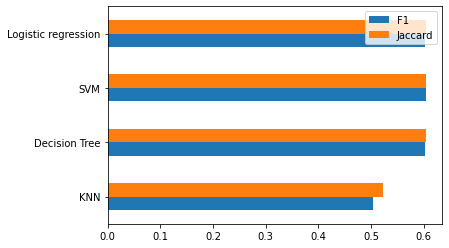

In [88]:
df_acc.plot(kind="barh")

In [89]:
print("Logistic regression has the highest accuracy of logloss")

Logistic regression has the highest accuracy of logloss


## Part 5: Conclusion

Logistic Regression Algorithm has the highest accuracy, which is the best option to build this model. The purpose of this project is to reduce claims for auto insurer and fatalities rate. Not only for insurance companies but also police departments will benefit from similar models to predict different accidents’ severities. 